In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [7]:
# load the airbnb dataset
df = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\harsh\AppData\Local\Temp\ipykernel_9248\1864352538.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [9]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [10]:
#summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [15]:
#to check the datatype of each column
df.dtypes

id                                  int64
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
house_rules                        object
dtype: object

In [16]:
#number of rows and columns
df.shape

(102058, 18)

In [ ]:
# Drop unnecessary columns
df.drop(['host id','NAME', 'host_identity_verified', 'host name', 'country', 'country code', 'license','last review'], axis=1, inplace=True)

In [18]:
#Remove duplicate rows based on all columns

df.drop_duplicates(inplace=True)
df.shape

(102058, 18)

In [19]:
#missing values
missing_values = df.isnull().sum()
missing_values


id                                    0
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      400
number of reviews                   183
reviews per month                 15818
review rate number                  319
calculated host listings count      319
availability 365                    448
house_rules                       51842
dtype: int64

In [20]:
num_columns = ['Construction year', 'minimum nights', 'number of reviews',
                     'reviews per month', 'review rate number', 'calculated host listings count',
                     'availability 365']
for i in num_columns:
    df[i].fillna(df[i].median(), inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_9248\48926302.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_9248\48926302.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [21]:
# For categorical columns, we can consider filling missing values with the mode
categorical_columns = ['neighbourhood group', 'neighbourhood','instant_bookable', 'cancellation_policy',
                       'room type', 'house_rules']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_9248\3816694296.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_9248\3816694296.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplac

In [29]:
df['price'].info()

<class 'pandas.core.series.Series'>
Index: 101572 entries, 0 to 102044
Series name: price
Non-Null Count   Dtype  
--------------   -----  
101572 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [ ]:
# Data Transformation
#df['price'] = df['price'].replace('$', '',regex=True).astype(float)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [27]:
df = df.dropna(subset=['price','service fee'])

In [28]:
# Checking the dataset after handling missing values
df.isnull().sum(), df.shape

(id                                0
 neighbourhood group               0
 neighbourhood                     0
 lat                               8
 long                              8
 instant_bookable                  0
 cancellation_policy               0
 room type                         0
 Construction year                 0
 price                             0
 service fee                       0
 minimum nights                    0
 number of reviews                 0
 reviews per month                 0
 review rate number                0
 calculated host listings count    0
 availability 365                  0
 house_rules                       0
 dtype: int64,
 (101572, 18))

In [30]:
# Grouping by 'neighbourhood' and calculating the mean 'lat' and 'long'
mean_coords = df.groupby('neighbourhood')[['lat', 'long']].mean()

# Applying the mean coordinates to missing values
df = df.set_index('neighbourhood')
df['lat'].fillna(mean_coords['lat'], inplace=True)
df['long'].fillna(mean_coords['long'], inplace=True)
df.reset_index(inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_9248\2185934204.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lat'].fillna(mean_coords['lat'], inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_9248\2185934204.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [31]:
#List the count of various room types avaliable with Airbnb
room_type_counts = df ['room type'].value_counts()
print("Count of Various Room Types Available:")
print(room_type_counts)

Count of Various Room Types Available:
room type
Entire home/apt    53182
Private room       46080
Shared room         2197
Hotel room           113
Name: count, dtype: int64


In [32]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
avg_price_neighborhood = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print("Average price per neighborhood group:")
print(avg_price_neighborhood)

Average price per neighborhood group:
neighbourhood group
Queens           630.137842
Bronx            627.676361
Brooklyn         626.264939
Staten Island    623.786017
Manhattan        622.683595
brookln          580.000000
Name: price, dtype: float64


In [33]:
# Finding the 10 neighborhoods with the most Airbnb locations.
df["neighbourhood"].value_counts().head(10)

neighbourhood
Bedford-Stuyvesant    7875
Williamsburg          7697
Harlem                5417
Bushwick              4927
Hell's Kitchen        3939
Upper West Side       3828
Upper East Side       3637
East Village          3452
Midtown               3339
Crown Heights         3233
Name: count, dtype: int64

In [34]:
df[["availability 365","price", "review rate number"]].describe()

,availability 365,price,review rate number
count,101572.000000,101572.000000,101572.000000
mean,140.835014,625.249921,3.277892
std,135.144933,331.651535,1.283028
min,-10.000000,50.000000,1.000000
25%,3.000000,340.000000,2.000000
50%,96.000000,624.000000,3.000000
75%,268.000000,913.000000,4.000000
max,3677.000000,1200.000000,5.000000


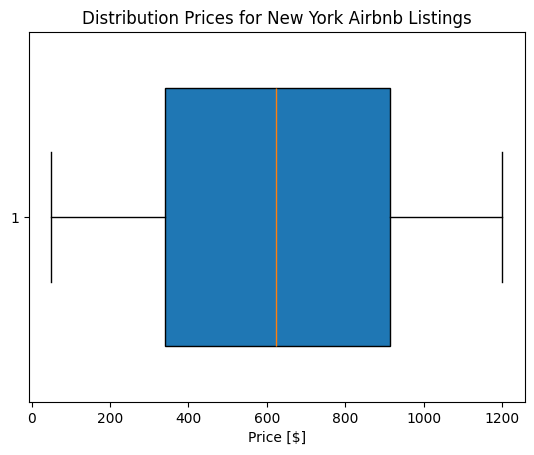

In [35]:
# Summarizing Home Prices of New york Airbnb listing

plt.boxplot(df["price"], vert=False, widths=0.7, patch_artist=True)
plt.xlabel("Price [$]")
plt.title("Distribution Prices for New York Airbnb Listings")
plt.show()

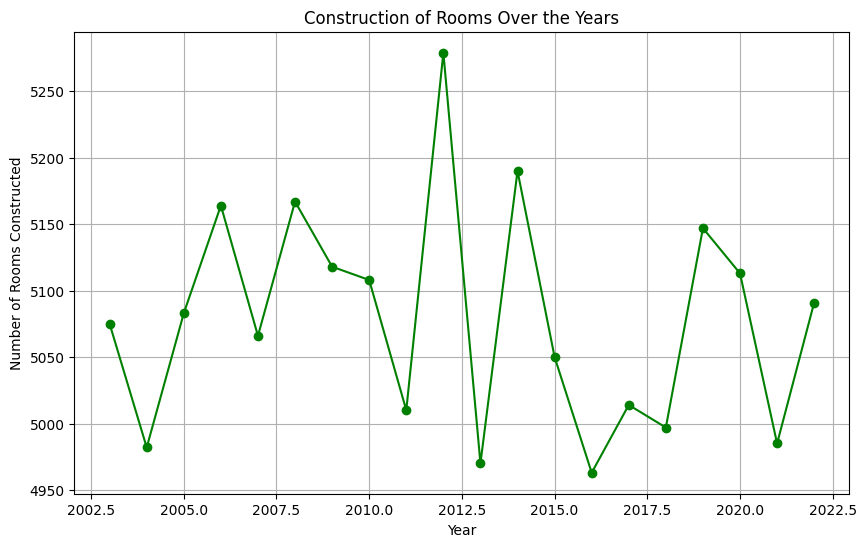

In [36]:
# Assuming construction_year is the column that denotes the year of construction
construction_year_counts = df['Construction year'].value_counts().sort_index()

# Line graph to show the years with maximum construction of rooms
plt.figure(figsize=(10, 6))
construction_year_counts.plot(kind='line', marker='o', color='green')
plt.title('Construction of Rooms Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Rooms Constructed')
plt.grid(True)
plt.show()

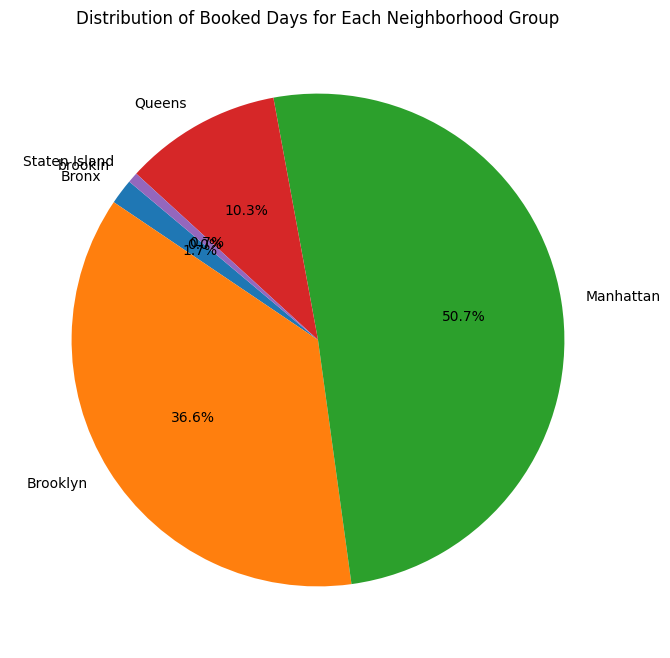

In [37]:
# Create a pie chart showing the distribution of booked days for each neighborhood group
booking_days = df.groupby('neighbourhood group')['minimum nights'].sum()
plt.figure(figsize=(8, 8))
pie_chart = booking_days.plot(kind='pie', autopct='%1.1f%%', startangle=140, labeldistance=1.1)
plt.title('Distribution of Booked Days for Each Neighborhood Group')
plt.ylabel('')
plt.show()

In [38]:
mean_price_by_neighbourhood = df.groupby("neighbourhood")["price"].mean().sort_values(ascending = False).round(2)

# Print object type, shape, and head
print("mean_price_by_neighbourhood type:", type(mean_price_by_neighbourhood))
print("mean_price_by_neighbourhood shape:", mean_price_by_neighbourhood.shape)
mean_price_by_neighbourhood_10 = mean_price_by_neighbourhood.head(10)

mean_price_by_neighbourhood type: <class 'pandas.core.series.Series'>
mean_price_by_neighbourhood shape: (224,)


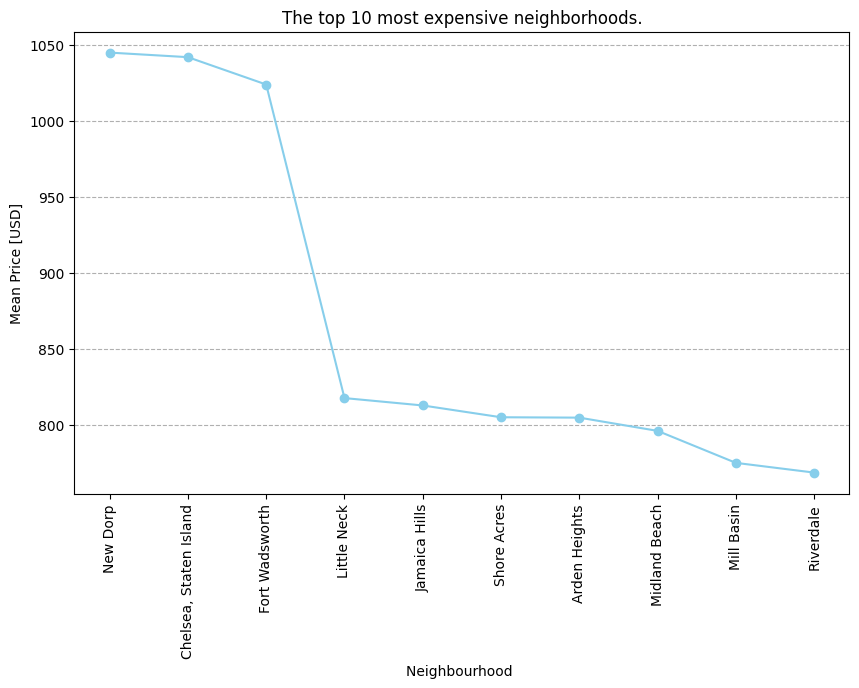

In [39]:
# The top 10 most expensive neighborhoods.
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_neighbourhood_10, 'o-', color='skyblue')
plt.xlabel('Neighbourhood ')
plt.ylabel('Mean Price [USD]')
plt.title('The top 10 most expensive neighborhoods.')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.show()